# short discussions on KDE plot

- 본 md 파일은 [pega님의 블로그](https://jehyunlee.github.io/2022/05/27/Python-DS-102-kdeplot/)를 보고, KDE plot이 가지는 의미 그리고 한계점을 다시 한번 정리하고자 작성하였습니다.  

## 0. 시작

- 현대 대한민국의 가장 큰 화두 중 하나는 `공정`입니다.   
- 기회의 공정, 결과의 공정, 또는 떨어질 때 떨어지더라도 이유라도 알자는 의미의 공정.
- 다 방면에서 서로 다른 의미로 공정이라는 단어가 오르내리고 있으며 공정과 함께 자주 나오는 키워드는 `부모찬스`입니다.
- 이와 관련해서 [경향신문](https://www.khan.co.kr/national/national-general/article/202205250600005)과 [언더스코어](http://underscore.kr/)에서는 의미있는 분석을 시도하였습니다.  

![IMAGE](./img/kde_plot_img1.png)

## 1. KDE plot

> Kernel Density Estimation

- 설문 결과 분포를 표현하기 위해 기사에서 사용된 시각화 기법을 `KDE plot`이라고 합니다.   
- Kernel Density Plot의 약자이며, 히스토그램이 가지고 있는 단점을 보완하기 위해 제안된 방식입니다. 

__히스토그램 vs KDE plot__ 

- 히스토그램 : 구간별 데이터 수를 bar plot 형식으로 표현

- KDE plot : 각 데이터로 밀도 분포를 추정하여 합산하는 방식

![IMAGE](./img/kde_plot_img2.png)

## 2. seaborn histogram vs kdeplot 

### 2.1 예제 데이터 

- seaborn에서 제공하는 Penguin dataset을 사용합니다. 
- 펭귄들의 체중 데이터를 그림으로 그려보겠습니다. 

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style("ticks")
sns.set_context("talk")
sns.set_palette("colorblind")

# penguins dataset 불러오기 
df_peng = sns.load_dataset("penguins")
df_peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 2.2 histogram vs KDE plot 

- histogram과 KDE plot을 차례로 그려 비교해봅니다.
- histogram은 구간(bins) 수에 따라 모양이 변합니다. 
- 이 글은 KDE plot의 특징에 집중하기에 코드는 따로 설명 하지 않습니다.

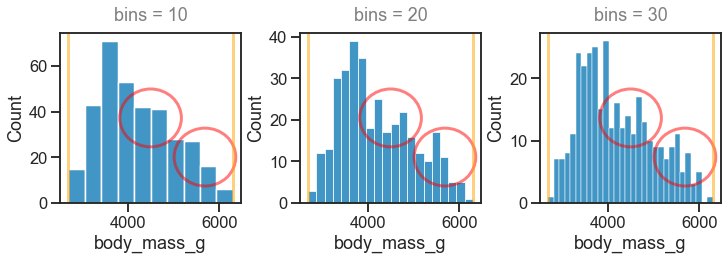

In [2]:
from matplotlib.patches import Circle

vmin, vmax = df_peng['body_mass_g'].min(), df_peng['body_mass_g'].max()

fig,axes = plt.subplots(ncols =3, figsize=[10,3.5], constrained_layout = True)

for i,ax in enumerate(axes,1):
    sns.histplot(x = "body_mass_g",data = df_peng, bins = 10*i,ax = ax)
    ax.set_title(f"bins = {10*i}",pad=12, color = "gray")
    ymin, ymax = ax.get_ylim()

    # Changes
    circle0 = Circle((0.5,0.5),0.17,fc = "none", ec = "r", lw = 3, alpha =0.5, transform = ax.transAxes)
    circle1 = Circle((0.8,0.27),0.17,fc = "none", ec = "r", lw = 3, alpha =0.5, transform = ax.transAxes)
    ax.add_patch(circle0)
    ax.add_patch(circle1)  

    # data min, max
    ax.axvline(vmin, c = "orange",lw =3, alpha =0.5)
    ax.axvline(vmax, c = "orange",lw =3, alpha =0.5)


- 같은 데이터를 10, 20, 30개의 구간을 가진 histogram으로 표현했습니다.  
- bins가 늘어날 수록 보이지 않던 봉우리들이 보입니다. (붉은 원)
- 그런데 한편으로 bins 수를 데이터 수만큼 늘리는 경우를 생각해보면, 그림이 별 의미가 없어질 것으로 보입니다.   
- y축 범위에서 bins가 증가할수록, 최대 count가 적어지는 것을 볼 수 있습니다. 
- 바구니의 범위가 좁아지니 데이터가 덜 담기는 것은 당연합니다.

- 같은 데이터를 KDE plot으로 그려보겠습니다. 
- `seaborn.kdeplot`에서는 kernel size를 bw_adjust라는 매개변수로 조절할 수 있습니다. 

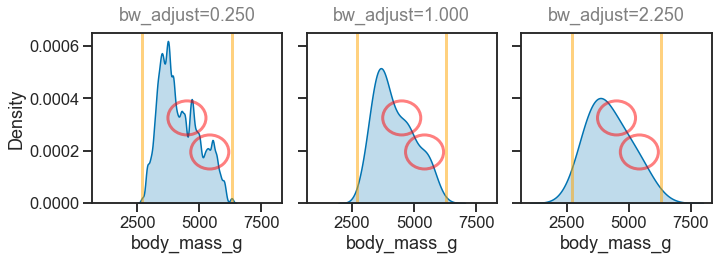

In [35]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 3.5), constrained_layout=True, 
                        sharex=True, sharey=True)

for i, ax in enumerate(axs, 1):
    sns.kdeplot(x="body_mass_g", data=df_peng, bw_adjust=i**2/4, fill=True, ax=ax)
    ax.set_title(f"bw_adjust={i**2/4:.3f}", pad=12, color="gray")
    
    ymin, ymax = ax.get_ylim()

    # changes
    circle0 = Circle((0.5, 0.5), 0.1, fc="none", ec="r", lw=3, alpha=0.5, transform=ax.transAxes)
    circle1 = Circle((0.62, 0.3), 0.1, fc="none", ec="r", lw=3, alpha=0.5, transform=ax.transAxes)
    ax.add_patch(circle0)
    ax.add_patch(circle1)
    
    # data min, max
    ax.axvline(vmin, c="orange", lw=3, alpha=0.5)
    ax.axvline(vmax, c="orange", lw=3, alpha=0.5)

- `sharex=True`와 `sharey=True`로 x와 y 범위를 통일시켰습니다. 
- bw_adjust가 커질수록 아이스크림이 녹듯이 높이가 낮아지고 옆으로 퍼지는 모습이 보입니다. 
- 붉은 원으로 표시한 **디테일도 점점 사라집니다.**
- 또한, 오렌지 선으로 표시한 데이터의 하한선과 상한선을 점점 더 많이 넘어가고 있습니다. 

- **데이터 범위를 넘어선다**는 것이 KDE plot의 가장 큰 특징입니다. 
- **제한된 데이터로 수집되지 않은 범위까지 추정을 해줄 수 있는 장점**으로 작용함과 동시에 __존재할 수 없는 데이터를 생성하는 단점__ 또한 존재하게 됩니다. 

### 2.3 KDE plot의 기본

- KDE plot의 특징을 조금 더 알아보겠습니다. 
- 먼저, **밀도 분포**라는 개념을 사용하기에 전체 넓이는 1로 조정이 됩니다. 

In [8]:
from shapely.geometry import Polygon
for i, ax in enumerate(axs):
    area = Polygon(axs[0].collections[0].get_paths()[0].vertices).area
    print(f"# area of KDE plot at axs[{i}] = {area:.3f}")


# area of KDE plot at axs[0] = 1.000
# area of KDE plot at axs[1] = 1.000
# area of KDE plot at axs[2] = 1.000


seaborn KDE plot 기능을 조금 더 알아보겠습니다. 

펭귄 데이터셋에는 Adelie, Chinstrap, Gentoo 펭귄이 있습니다. 

전체와 함께 이들 각각의 분포를 함께 살펴봅니다. 

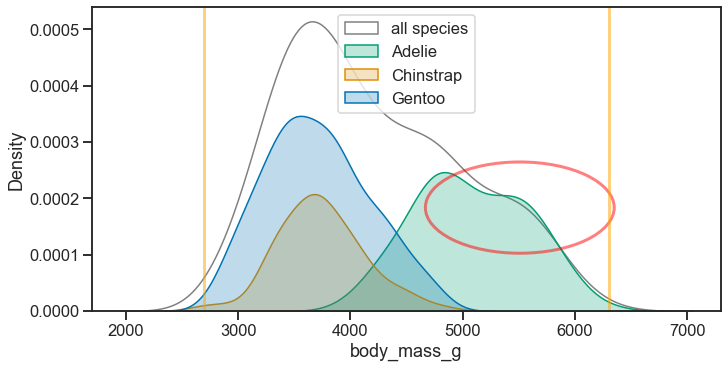

In [36]:
fig,ax = plt.subplots(figsize=[10,5],constrained_layout = True)
sns.kdeplot(x = "body_mass_g", data = df_peng, fill =True, ax =ax , ec = "gray", fc = "w")
sns.kdeplot(x = "body_mass_g",data = df_peng, fill =True, hue = "species",ax =ax)

xmin, xmax = ax.get_xlim()

circle0 = Circle((0.68, 0.34), 0.15, fc="none", ec="r", lw=3, alpha=0.5, transform=ax.transAxes)
ax.add_patch(circle0)

# legend 
handles = ax.get_children()[:4]
labels = ["all species", "Adelie", "Chinstrap","Gentoo"]
ax.legend(handles= handles, labels = labels)

ax.axvline(vmin, c="orange", lw=3, alpha=0.5)
ax.axvline(vmax, c="orange", lw=3, alpha=0.5)

세 종이 서로 다른 분포를 겹쳐 그려져 있습니다. 

Adelie 펭귄의 분포 일부가 전체의 합보다 높게 그려져 있습니다. 

> 여기에서도 KDE plot이 정량적으로 부정확할 수 있음을 알 수 있습니다. 

이렇게 나누어 그리면 각각의 넓이가 데이터 비율만큼 표현이 됩니다. 

In [24]:
areas = []
for i, (p, label) in enumerate(zip(ax.get_children()[:4], labels)):
    area = Polygon(p.get_paths()[0].vertices).area
    areas.append(area)
    print(f"# area of KDE plot: {label} = {area:.3f}")

# area of KDE plot: all species = 1.000
# area of KDE plot: Adelie = 0.360
# area of KDE plot: Chinstrap = 0.199
# area of KDE plot: Gentoo = 0.441


In [25]:
0.36+0.199+0.441

1.0

### 2.4 데이터 범위 밖 잘라내기 

- 데이터 범위를 벗어나 그려지는 문제를 해결하기 위한 방법으로 `cut` 매개변수를 제시하고 있습니다. 
- smoothing bandwidth에 곱해지는 상수로 기본값은 3입니다. 
- 크기를 줄이면 적어지는데, `cut=0`을 입력하면 입력된 데이터 범위까지만 끊습니다.

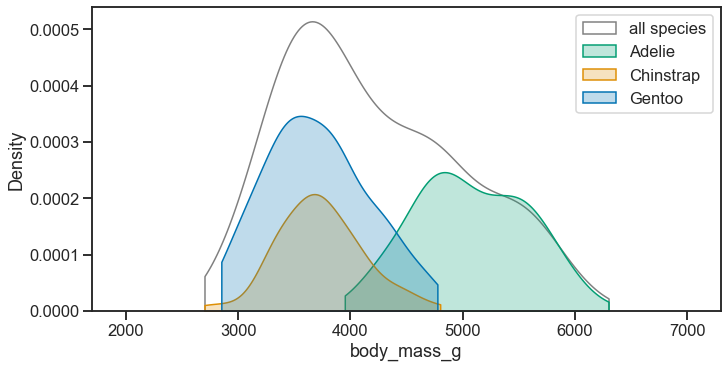

In [26]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, ax=ax, ec="gray", fc="w", cut=0)
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, hue="species", ax=ax, cut=0)

ax.set_xlim(xmin, xmax)

# legend
handles = ax.get_children()[:4]
labels = ["all species", "Adelie", "Chinstrap", "Gentoo"]
ax.legend(handles=handles, labels=labels)

### 2.5 가능한 데이터 범위 밖 잘라내기 

- 수집된 데이터가 가능한 데이터의 일부인 경우가 많습니다.
- 이 때 데이터 값으로 끊으면 이 또한 왜곡이 될 수 있기 때문에, 특정 범위를 지정할 수 있습니다.
- clip이라는 이름의 매개변수를 사용합니다. 여기서는 2500 ~ 6500 범위로 잘랐습니다.
- cut에 비해 덜 잘렸고, 이 범위 안에 있는 Chinstrap과 Gentoo의 오른쪽, 그리고 Adelie의 왼쪽은 전혀 잘리지 않았습니다.

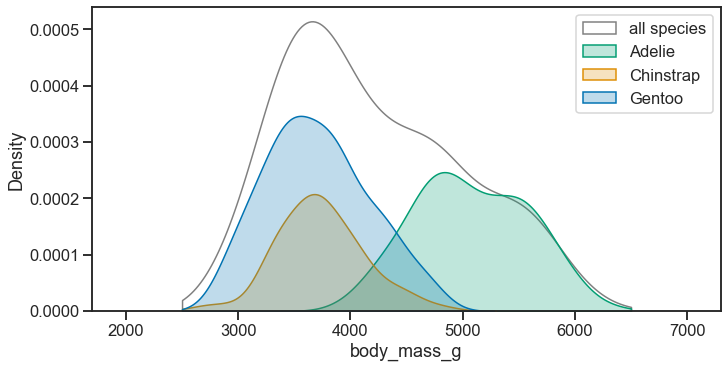

In [27]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, ax=ax, ec="gray", fc="w", clip=(2500, 6500))
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, hue="species", ax=ax, clip=(2500, 6500))

ax.set_xlim(xmin, xmax)

# legend
handles = ax.get_children()[:4]
labels = ["all species", "Adelie", "Chinstrap", "Gentoo"]
ax.legend(handles=handles, labels=labels)

### 2.6 자른 이후의 넓이 확인

- KDE plot은 밀도 함수이기 때문에 넓이 =1로 설정된다고 했습니다. 
- 그렇지만 cut이나 clip을 적용하면 잘리는 만큼 넓이가 작아집니다. 
- cut 적용 전과 뒤를 겹쳐서 확인합니다.

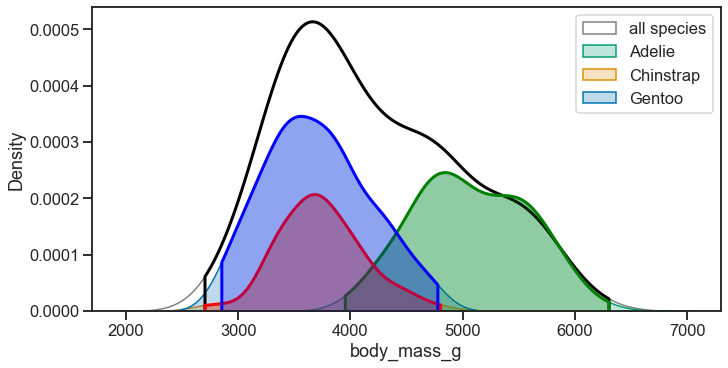

In [28]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

# without cut=0
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, ax=ax, ec="gray", fc="w")
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, hue="species", ax=ax)

# with cut=0
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, ax=ax, lw=3, ec="k", fc="#FFFFFF00", cut=0)
sns.kdeplot(x="body_mass_g", data=df_peng, fill=True, hue="species", ax=ax, 
            cut=0, lw=3, palette=["b", "r", "g"])

# legend
handles = ax.get_children()[:4]
labels = ["all species", "Adelie", "Chinstrap", "Gentoo"]
ax.legend(handles=handles, labels=labels)

In [29]:
for i, (p, label, a) in enumerate(zip(ax.get_children()[4:8], labels, areas)):
    area = Polygon(p.get_paths()[0].vertices).area
    print(f"# area of KDE plot: {label} = {area:.3f} (cf. {a:.3f})")

# area of KDE plot: all species = 0.986 (cf. 1.000)
# area of KDE plot: Adelie = 0.353 (cf. 0.360)
# area of KDE plot: Chinstrap = 0.195 (cf. 0.199)
# area of KDE plot: Gentoo = 0.423 (cf. 0.441)


- 잘려지는 넓이가 보상되고 있지 않습니다. 
- 데이터에 따라, 그리고 수집하는 숫자의 범위에 따라 얼마가 잘려질지는 알 수 없습니다.

- 기사에 나온 그림처럼 분포가 한쪽 끝에 치우쳐 있다면 훨씬 많이 잘려나갈 것입니다.

- 보완 알고리즘을 구현하려 해도 생각보다 복잡합니다. 단순하게 비율을 곱하는 것으로는 부족합니다.

## 3. 결론

- KDE plot은 매끈한 곡선으로 이루어져 보기 좋고 겹쳐 그리기 좋아 많이 사용됩니다. 
- 그러나 확인했듯이 단점이 적지 않습니다. 
- KDE plot은 참고용으로만 사용하고, 실제 결론은 통계적 분석으로 냅시다!